In [84]:
# Load all necessary libraries for EDA.
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import missingno as msng
import os

In [85]:
# Pull in the dataset, format as a DataFrame, and print head.
data = pd.read_csv(r'C:\\Users\\asiminovsky\\Desktop\\GADataScience\\Ali0316\\FinalProject\\Ali Lead Scoring Data.csv')
data.head

C:\Users\asiminovsky\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3165: DtypeWarning: Columns (13,17,18,20,21,22,23,24,25,26,27,29,30,31,35) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


<bound method NDFrame.head of         Lead_Age__c Lead_Cohort__c      Lead_Type__c  NumberOfEmployees  \
0            1432.0         May-17      Try PI Offer            21400.0   
1               NaN            NaN           Webinar                NaN   
2               NaN            NaN           Content                NaN   
3               NaN            NaN           Content                NaN   
4               NaN            NaN           Content                NaN   
...             ...            ...               ...                ...   
185753          1.0         Nov-20           Content                NaN   
185754         13.0         Oct-20      Request Demo                NaN   
185755          0.0         Nov-20         Live Chat                NaN   
185756        779.0         Sep-18      Try PI Offer               30.0   
185757          0.0         Nov-20  Business Inquiry                NaN   

             Status                     pi__campaign__c pi__grade__c 

In [86]:
# Print column names.
list(data.columns)

['Lead_Age__c',
 'Lead_Cohort__c',
 'Lead_Type__c',
 'NumberOfEmployees',
 'Status',
 'pi__campaign__c',
 'pi__grade__c',
 'MQL_Lead_Type__c',
 'ZoomInfo_Industry__c',
 'Zoominfo_Job_Role__c',
 'Zoominfo_Company__c',
 'Zoominfo_Job_Senority__c',
 'Zoominfo_Number_of_Employees__c',
 'Buyer_Persona__c',
 'Account Max Number of Employees',
 'Quote_Subscription Amount',
 'Netsuite_Amount Paid',
 'Key Contact Title',
 'Key Contact Department',
 'Lead Created Date',
 'Campaign__c',
 'Opportunity_Campaign_Channel__c',
 'Opportunity Pardot Campaign',
 'Converted_to_Opportunity__c',
 'IsConverted',
 'pi__campaign__c_1',
 'Opportunity_Campaign_Type__c',
 'CampaignId',
 'Lead Record Type',
 'Lead_Lead Type',
 'Original Lead Source',
 'Re_MQL_Date__c',
 'Lead Pardot Score_1',
 'Lead Pardot Score',
 'key_contact_lead_score',
 'T90_Hero_Point_Buckets__c',
 'Lead ID',
 'Lead Email']

In [87]:
# Rename columns for simplicity.

data.columns = ['lead_age',
'lead_cohort',
 'lead_type',
 'num_employees',
 'status',
 'lead_campaign',
 'grade',
 'MQL_type',
 'zi_industry',
 'zi_role',
 'zi_company',
 'zi_seniority',
 'zi_num_employees',
 'persona',
 'max_employees',
 'quote_sub',
 'amount_paid',
 'key_title',
 'key_dept',
 'lead_creation_date',
 'campaign',
 'opp_channel',
 'opp_campaign',
 'converted_to_opp',
 'is_converted',
 'pi_campaign',
 'opp_campaign_type',
 'campaign_id',
 'lead_record_type',
 'lead_lead_type',
 'og_lead_source',
 're_MQL_date',
 'lead_pardot_score',
 'lead_pardot_score_2',
 'key_contact_lead_score',
 'hero_points',
 'lead_id',
 'lead_email']

In [66]:
# Drop irrelevant columns.

data = data.drop(['lead_cohort','lead_campaign', 'persona','quote_sub','amount_paid','key_title','key_dept',
          'campaign','opp_channel','opp_campaign','pi_campaign','campaign_id','og_lead_source',
          'lead_pardot_score','key_contact_lead_score','hero_points','lead_id','lead_email'], axis=1)

KeyError: "['lead_campaign' 'persona' 'quote_sub' 'amount_paid' 'key_title'\n 'key_dept' 'campaign' 'opp_channel' 'opp_campaign' 'pi_campaign'\n 'campaign_id' 'og_lead_source' 'lead_pardot_score'\n 'key_contact_lead_score' 'hero_points' 'lead_id' 'lead_email'] not found in axis"

In [89]:
data = data.drop(['lead_cohort'],axis=1)

In [90]:
# Check the shape of the dataframe.
data.shape

(185758, 37)

In [91]:
# Check variable types.
data.dtypes

lead_age                  float64
lead_type                  object
num_employees             float64
status                     object
lead_campaign              object
grade                      object
MQL_type                   object
zi_industry                object
zi_role                    object
zi_company                 object
zi_seniority               object
zi_num_employees          float64
persona                    object
max_employees             float64
quote_sub                 float64
amount_paid               float64
key_title                  object
key_dept                   object
lead_creation_date         object
campaign                   object
opp_channel                object
opp_campaign               object
converted_to_opp           object
is_converted               object
pi_campaign                object
opp_campaign_type          object
campaign_id                object
lead_record_type           object
lead_lead_type             object
og_lead_source

In [92]:
# Convert converted_to_opp to Boolean.

## Am struggling here!

In [93]:
# Convert lead_creation_date to datetime format.
pd.to_datetime(data['lead_creation_date'])

data['lead_creation_date'] =  pd.to_datetime(data['lead_creation_date'], format='%m/%d/%Y %H:%M')

In [94]:
# Identify and delete duplicate rows.
duplicate = data[data.duplicated()]
print(duplicate)

data.drop_duplicates(inplace=True)

Empty DataFrame
Columns: [lead_age, lead_type, num_employees, status, lead_campaign, grade, MQL_type, zi_industry, zi_role, zi_company, zi_seniority, zi_num_employees, persona, max_employees, quote_sub, amount_paid, key_title, key_dept, lead_creation_date, campaign, opp_channel, opp_campaign, converted_to_opp, is_converted, pi_campaign, opp_campaign_type, campaign_id, lead_record_type, lead_lead_type, og_lead_source, re_MQL_date, lead_pardot_score, lead_pardot_score_2, key_contact_lead_score, hero_points, lead_id, lead_email]
Index: []

[0 rows x 37 columns]


lead_age                     723
lead_type                  38492
num_employees             125791
status                       723
lead_campaign               3411
grade                      94599
MQL_type                  126813
zi_industry               167123
zi_role                   174109
zi_company                182815
zi_seniority              180678
zi_num_employees          165544
persona                   181901
max_employees             176030
quote_sub                 182385
amount_paid               184782
key_title                 180289
key_dept                  185584
lead_creation_date             0
campaign                  185568
opp_channel               184713
opp_campaign              180318
converted_to_opp             723
is_converted                 723
pi_campaign               177222
opp_campaign_type         183919
campaign_id               179945
lead_record_type            3785
lead_lead_type            175104
og_lead_source            181179
re_MQL_dat

<AxesSubplot:>

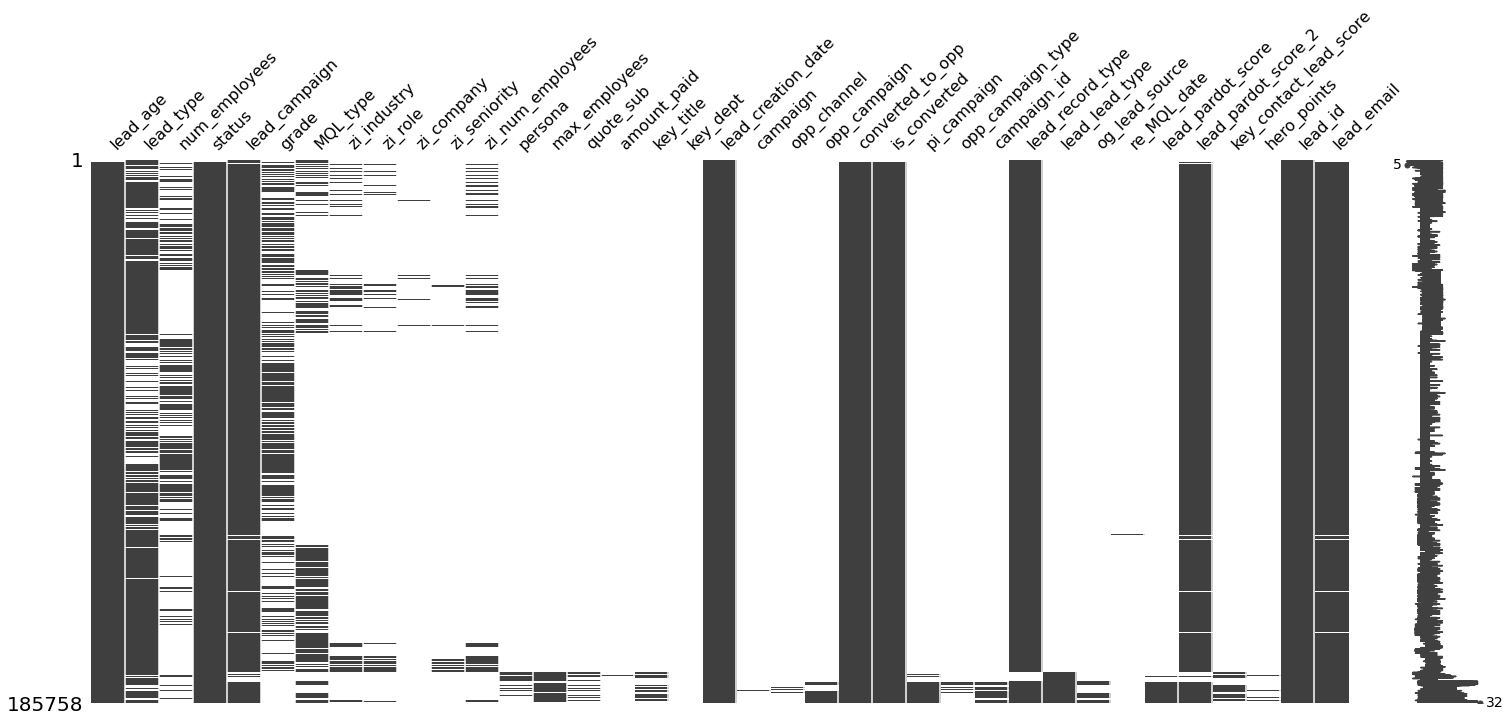

In [95]:
# Check for missing values.

print(data.isnull().sum())
msng.matrix(data)

# As anticipated, there is a great deal of missing data, most of which is MNAR.

In [96]:
# Most missing values are MNAR and will be retained as missing. For lead_type, change all null values to the mode.

print(data['lead_type'].mode())
data['lead_type'].fillna("Try PI Offer", inplace = True)

# For all null converted_to_opp, replace with boolean False.
data['converted_to_opp'].fillna(False,inplace=True)

0    Try PI Offer
dtype: object


In [97]:
# Create a column containing just the month from lead_creation_date.

data['month'] = data['lead_creation_date'].dt.month

In [98]:
# Check descriptives of float and integer variables in DataFrame and ensure all values make sense.

data.describe()

,lead_age,num_employees,zi_num_employees,max_employees,quote_sub,amount_paid,lead_pardot_score,lead_pardot_score_2,key_contact_lead_score,month
count,185035.000000,5.996700e+04,2.021400e+04,9.728000e+03,3373.000000,976.000000,8075.000000,181071.000000,7186.000000,185758.000000
mean,561.454406,1.537707e+04,1.333707e+04,5.818328e+03,10333.170949,10088.655348,142.519505,1.880638,37.791678,6.029345
std,348.836836,1.042216e+05,6.402344e+04,5.247049e+04,14350.338808,11075.951968,378.175700,183.059326,331.327533,3.275856
min,0.000000,1.000000e+00,1.000000e+00,0.000000e+00,0.000000,0.000000,-430.000000,-992.000000,-11642.000000,1.000000
25%,297.000000,9.000000e+01,2.700000e+01,2.000000e+01,5300.000000,4450.000000,42.000000,0.000000,-50.000000,4.000000
50%,581.000000,3.500000e+02,1.560000e+02,7.500000e+01,6900.000000,7828.750000,55.000000,4.000000,-28.000000,5.000000
75%,754.000000,3.000000e+03,3.000000e+03,3.500000e+02,12500.000000,12655.050000,107.000000,32.000000,51.000000,9.000000
max,1731.000000,2.300000e+06,2.200000e+06,2.200000e+06,389890.000000,121125.000000,3813.000000,20420.000000,3894.000000,12.000000


In [100]:
# Check value counts of all string variables in DataFrame.

print(data['lead_type'].value_counts())

print(data['status'].value_counts())

print(data['grade'].value_counts())

print(data['MQL_type'].value_counts())

print(data['zi_role'].value_counts())

print(data['zi_company'].value_counts())

print(data['zi_seniority'].value_counts())

print(data['converted_to_opp'].value_counts())


Try PI Offer                         80922
Content                              32156
Request Demo                         20615
Outbound                             20044
Webinar                               8965
Unknown                               7749
Business Inquiry                      6528
Events                                2789
Become a Partner                      1878
Learning                              1385
Partner Recruitment                    565
1:1 Session                            552
Live Chat                              297
Inbound                                232
Paid                                   227
Freemium                               130
Standard                               127
Vistage                                127
Referral                               122
Clearbit Append                        100
Calculator                              78
Workshop                                54
Free BA Demo                            43
Talent Opti

In [101]:
# As per above, struggling to convert converted_to_opp to Boolean, resulting in two "False" values and 
# impacting ability to create accurate visualizations.

In [102]:
# Check for correlations.

data.corr()

,lead_age,num_employees,zi_num_employees,max_employees,quote_sub,amount_paid,converted_to_opp,lead_pardot_score,lead_pardot_score_2,key_contact_lead_score,month
lead_age,1.000000,0.020668,0.015589,0.007140,-0.020380,-0.014684,-0.379844,-0.025094,-0.005653,0.033539,0.035138
num_employees,0.020668,1.000000,0.918679,0.696777,0.194602,0.085493,-0.015424,0.011169,0.012110,-0.006647,-0.009196
zi_num_employees,0.015589,0.918679,1.000000,0.882592,0.002369,-0.045517,-0.021667,-0.018658,-0.027350,-0.032743,-0.006613
max_employees,0.007140,0.696777,0.882592,1.000000,0.045606,0.083371,NaN,-0.005737,-0.006039,-0.011703,-0.022248
quote_sub,-0.020380,0.194602,0.002369,0.045606,1.000000,0.733627,NaN,-0.022044,-0.024480,-0.060440,-0.008896
amount_paid,-0.014684,0.085493,-0.045517,0.083371,0.733627,1.000000,NaN,0.020508,0.020759,-0.034503,0.001788
converted_to_opp,-0.379844,-0.015424,-0.021667,NaN,NaN,NaN,1.000000,NaN,0.163938,NaN,0.039061
lead_pardot_score,-0.025094,0.011169,-0.018658,-0.005737,-0.022044,0.020508,NaN,1.000000,0.985063,0.015014,0.000022
lead_pardot_score_2,-0.005653,0.012110,-0.027350,-0.006039,-0.024480,0.020759,0.163938,0.985063,1.000000,0.017416,0.121183
key_contact_lead_score,0.033539,-0.006647,-0.032743,-0.011703,-0.060440,-0.034503,NaN,0.015014,0.017416,1.000000,0.018682


<AxesSubplot:xlabel='converted_to_opp', ylabel='lead_pardot_score_2'>

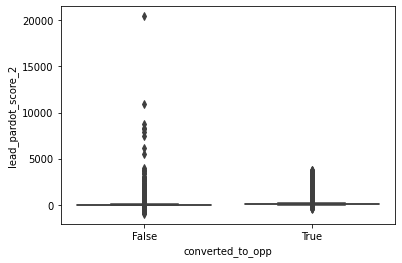

In [104]:
# Make a boxplot of main anticipated relationship: lead score versus opportunity conversion.
sns.boxplot(x="converted_to_opp", y="lead_pardot_score_2", data=data)

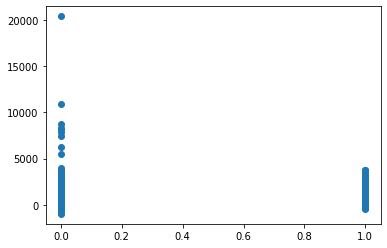

In [111]:
# Create scatterplots of critical anticipated relationships.
print(plt.scatter(data['converted_to_opp'],data['lead_pardot_score_2']))

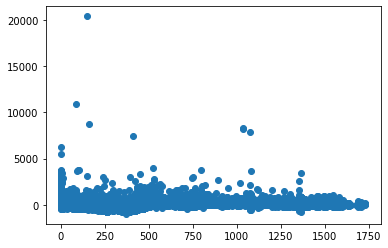

In [108]:
print(plt.scatter(data['lead_age'],data['lead_pardot_score_2']))

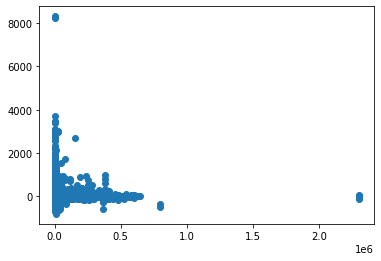

In [109]:
print(plt.scatter(data['num_employees'],data['lead_pardot_score_2']))

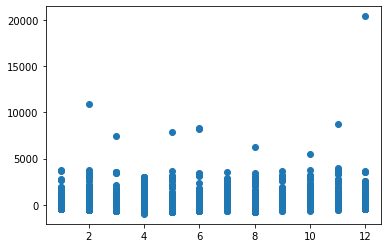

In [110]:
print(plt.scatter(data['month'],data['lead_pardot_score_2']))

In [ ]:
# Conclusions: the data are now clean and based on the correlation matrix above, I anticipate finding some relationships between
# the various independent variables and the dependent variable.